In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [16]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_spin_glass.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_spin_glass.pkl")

In [4]:
betas = res_ex["betas"]

In [5]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.048 std_fe: 3.16E-02 M: 0.008 S: 0.681 E: -0.233: 0.0334, B1 = 0.0010
fe: -3.689 std_fe: 5.48E-02 M: 0.008 S: 0.653 E: -0.423: 0.0243, B1 = -0.011
fe: -2.629 std_fe: 6.87E-02 M: 0.006 S: 0.614 E: -0.583: 0.0291, B1 = 0.0110
fe: -2.132 std_fe: 7.51E-02 M: 0.009 S: 0.569 E: -0.709: 0.0151, B1 = -0.006
fe: -1.858 std_fe: 7.72E-02 M: 0.014 S: 0.528 E: -0.802: 0.0311, B1 = 0.0050
fe: -1.688 std_fe: 7.53E-02 M: 0.010 S: 0.481 E: -0.886: 0.0342, B1 = -0.0088
fe: -1.580 std_fe: 6.90E-02 M: 0.015 S: 0.432 E: -0.963: 0.0391, B1 = -0.0197
fe: -1.507 std_fe: 5.54E-02 M: 0.008 S: 0.382 E: -1.029: 0.03, B1 = -0.00100
fe: -1.458 std_fe: 4.23E-02 M: 0.009 S: 0.333 E: -1.088: 0.0175, B1 = -0.0166
fe: -1.423 std_fe: 3.23E-02 M: 0.012 S: 0.295 E: -1.127: 0.016, B1 = 0.007731
fe: -1.397 std_fe: 2.47E-02 M: 0.011 S: 0.273 E: -1.149: 0.0381, B1 = 0.01908
fe: -1.377 std_fe: 2.02E-02 M: 0.010 S: 0.249 E: -1.170: 0.0489, B1 = -0.0022
fe: -1.361 std_fe: 1.64E-02 M: 0.012 S: 0.231 E: -1.184: 0.0274, B1 = 

In [6]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=2000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.048 std_fe: 1.57E-02 M: 0.008 S: 0.681 E: -0.238: 0.0234, B1 = 0.0950
fe: -3.693 std_fe: 2.84E-02 M: 0.007 S: 0.651 E: -0.437: 0.0247, B1 = 0.280
fe: -2.638 std_fe: 3.72E-02 M: 0.009 S: 0.609 E: -0.609: 0.0364, B1 = 0.497
fe: -2.145 std_fe: 4.33E-02 M: 0.008 S: 0.564 E: -0.734: 0.0277, B1 = 0.708
fe: -1.874 std_fe: 4.50E-02 M: 0.007 S: 0.519 E: -0.835: 0.0294, B1 = 0.9112
fe: -1.707 std_fe: 4.57E-02 M: 0.009 S: 0.475 E: -0.915: 0.0219, B1 = 1.1341
fe: -1.599 std_fe: 4.25E-02 M: 0.008 S: 0.437 E: -0.974: 0.0249, B1 = 1.3558
fe: -1.524 std_fe: 3.81E-02 M: 0.008 S: 0.396 E: -1.029: 0.036, B1 = 1.59105
fe: -1.471 std_fe: 3.28E-02 M: 0.009 S: 0.356 E: -1.074: 0.0274, B1 = 1.8688
fe: -1.433 std_fe: 2.82E-02 M: 0.007 S: 0.326 E: -1.106: 0.0422, B1 = 2.1843
fe: -1.404 std_fe: 2.34E-02 M: 0.014 S: 0.299 E: -1.132: 0.0221, B1 = 2.4668
fe: -1.382 std_fe: 1.83E-02 M: 0.009 S: 0.273 E: -1.155: 0.0241, B1 = 2.7479
fe: -1.366 std_fe: 1.78E-02 M: 0.004 S: 0.254 E: -1.170: 0.0464, B1 = 3.1258
fe

In [7]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=2000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.049 std_fe: 3.64E-05 M: 0.009 S: 0.682 E: -0.232: 0.0276, B1 = -0.002
fe: -3.694 std_fe: 6.84E-05 M: 0.007 S: 0.651 E: -0.439: 0.0319, B1 = -0.012
fe: -2.641 std_fe: 9.42E-05 M: 0.007 S: 0.608 E: -0.614: 0.0201, B1 = -0.009
fe: -2.152 std_fe: 1.15E-04 M: 0.009 S: 0.561 E: -0.749: 0.0402, B1 = 0.0062
fe: -1.882 std_fe: 1.35E-04 M: 0.010 S: 0.515 E: -0.852: 0.0148, B1 = 0.0030
fe: -1.717 std_fe: 1.72E-04 M: 0.010 S: 0.474 E: -0.926: 0.0192, B1 = -0.002
fe: -1.608 std_fe: 2.00E-04 M: 0.012 S: 0.431 E: -0.993: 0.035, B1 = -0.0178
fe: -1.532 std_fe: 3.83E-04 M: 0.018 S: 0.402 E: -1.029: 0.024, B1 = -0.01116
fe: -1.484 std_fe: 7.44E-04 M: 0.063 S: 0.377 E: -1.065: 0.0273, B1 = -0.0160
fe: -1.440 std_fe: 6.92E-04 M: 0.049 S: 0.334 E: -1.106: 0.0456, B1 = -0.0235
fe: -1.414 std_fe: 7.53E-04 M: 0.031 S: 0.317 E: -1.126: 0.0281, B1 = -0.0165
fe: -1.386 std_fe: 5.36E-04 M: 0.028 S: 0.278 E: -1.154: 0.0146, B1 = -0.0014
fe: -1.366 std_fe: 2.82E-04 M: 0.018 S: 0.250 E: -1.173: 0.0145, B1 = -

In [8]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.049, ener: -0.234, M: 0.000, iter 8
fe: -3.697, ener: -0.455, M: 0.000, iter 10
fe: -2.650, ener: -0.652, M: 0.000, iter 13
fe: -2.172, ener: -0.821, M: 0.000, iter 19
fe: -1.917, ener: -0.963, M: 0.000, iter 29
fe: -1.768, ener: -1.080, M: 0.000, iter 51
fe: -1.676, ener: -1.175, M: 0.000, iter 127
fe: -1.617, ener: -1.260, M: 0.220, iter 1000
fe: -1.507, ener: -1.258, M: 0.357, iter 1000
fe: -1.536, ener: -1.309, M: 0.297, iter 1000
fe: -1.595, ener: -1.380, M: 0.437, iter 1000
fe: -1.463, ener: -1.424, M: 0.658, iter 1000
fe: -1.659, ener: -1.465, M: 0.748, iter 1000
fe: -1.320, ener: -1.355, M: 0.607, iter 1000
fe: -1.340, ener: -1.385, M: 0.633, iter 1000
fe: -1.686, ener: -1.491, M: 0.733, iter 1000
fe: -1.481, ener: -1.361, M: 0.662, iter 1000
fe: -1.531, ener: -1.563, M: 0.774, iter 1000
fe: -1.622, ener: -1.423, M: 0.713, iter 1000


In [9]:
from save_data import save_pickle_zip
name_file="spin_glass_2d"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
        "nn_z2": res_nn_z2,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [ ]:
from save_data import load_pickle_zip
all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

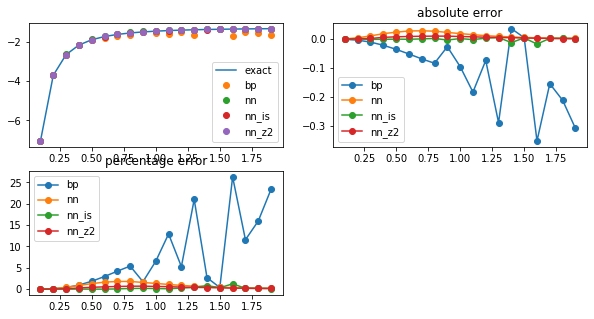

In [11]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is, res_nn_z2], init_=0)
#plt.ylim(-0.001,0.11)
plt.show()

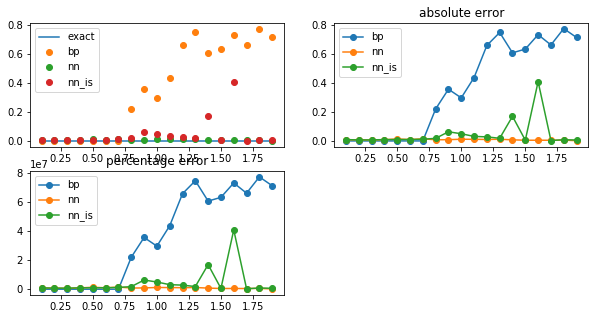

In [12]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

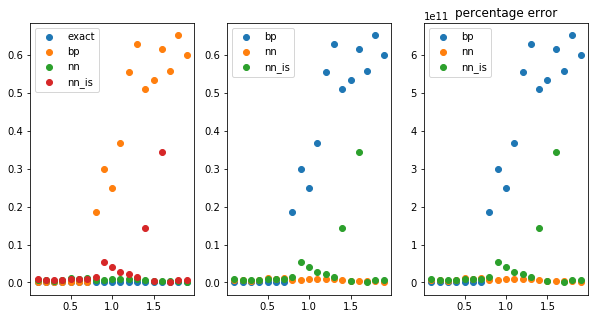

In [13]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

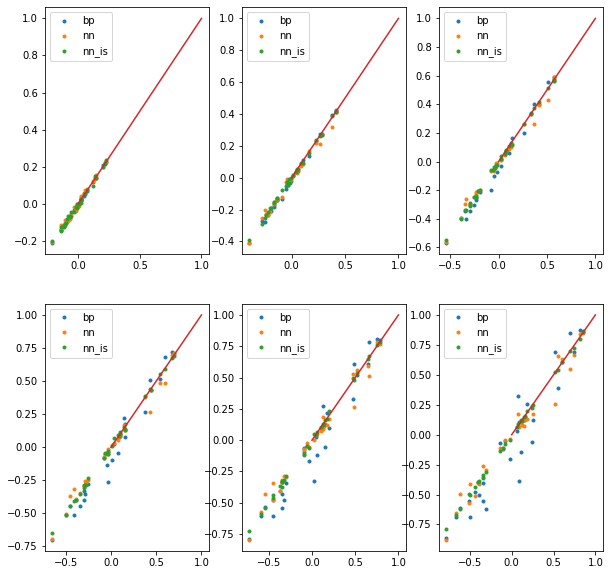

In [14]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

# Plots

<function matplotlib.pyplot.show(*args, **kw)>

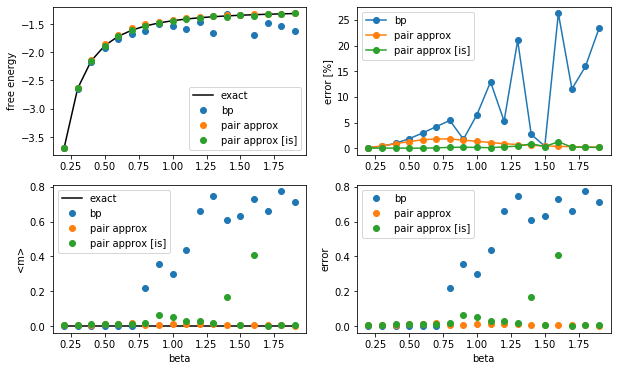

In [15]:
import matplotlib.pyplot as plt
init_ =1
name_file = "spin_glass_2d.pdf"
label="fe"

others = [res_bp, res_nn, res_nn_is]
res_nn["name"] = "pair approx"
res_nn_is["name"] = "pair approx [is]"

plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/model_.N,
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/model_.N, "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show